- Zbiór danych (ang. dataset) – zbiór elementów, który ma zostać poddany analizie. Na przykład: zdjęcia psów z podpisanymi rasami.
- Obserwacja (ang. observation) – pojedynczy element zbioru danych. Na przykład: pojedyncze zdjęcie psa z podpisaną rasą
- Cecha (ang. feature) – parametr za pomocą którego opisywane są obserwacje.
Na przykład ze zdjęcia można odczytać: kolor, długość sierści, długość ogona, rasę psa
- Predykcja (ang. prediction) – proces wyznaczania wartości jednych cech na podstawie innych cech. Na przykład: wykrywanie nieznanej rasy psa na podstawie koloru, długości sierści, długości ogona
- Cecha niezależna (ang. independent feature) – cecha, na podstawie której wykonywana jest predykcja. Na przykład, w zadaniu wykrywania rasy psa na podstawie koloru, długości sierści oraz długości ogona cechami niezależnymi są kolor, długość sierści, długość ogona.
- Cecha zależna (ang. dependent feature) – cecha, której wartość jest wynikiem predykcji. Na przykład, w zadaniu wykrywania rasy psa na podstawie koloru, długości sierści oraz długości ogona cechą zależną jest rasa.
- Zbiór wejściowy (ang. input): zbiór wartości cech niezależnych dla zbioru danych. Oznaczany jest jako 𝑋. Na przykład, następująca macierz przedstawia zbiór wejściowy zawierający dane trzech psów:

![Alt text](image.png)

- Zbiór wyjściowy

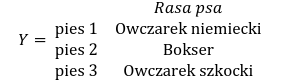


Listing 2.1. Przykład generacji funkcji aproksymowanej zaszumionej oraz funkcji aproksymującej.

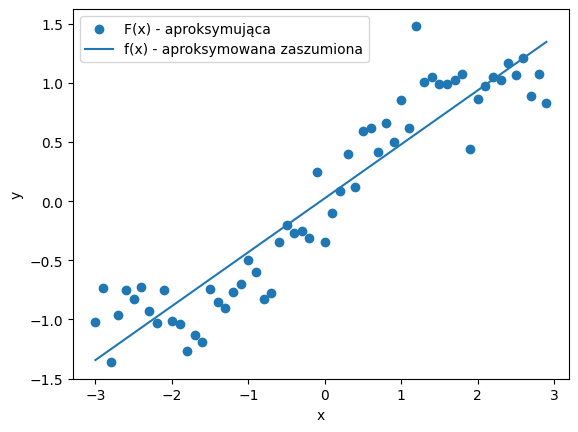

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
x = np.arange(-3,3, 0.1).reshape((-1,1))
y = np.tanh(x) + np.random.randn(*x.shape)*0.2
ypred = LinearRegression().fit(x,y).predict(x)
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, ypred)
plt.legend([ 'F(x) - aproksymująca',
'f(x) - aproksymowana zaszumiona'])

Pierwszy przykład


MSE: 22.99, MAE: 3.28, MAPE: 0.18
   Przestepczosc  Mieszkaniowa  Niemieszkaniowa  PrzyRzece  TlenkiAzotu  \
0        0.00632          18.0             2.31          0        0.538   
1        0.02731           0.0             7.07          0        0.469   
2        0.02729           0.0             7.07          0        0.469   
3        0.03237           0.0             2.18          0        0.458   
4        0.06905           0.0             2.18          0        0.458   

   LPokojow  WiekMieszkan  OdleglOdCentrow  DostDoMetra  Podatki  NauczUczen  \
0     6.575          65.2           4.0900            1    296.0        15.3   
1     6.421          78.9           4.9671            2    242.0        17.8   
2     7.185          61.1           4.9671            2    242.0        17.8   
3     6.998          45.8           6.0622            3    222.0        18.7   
4     7.147          54.2           6.0622            3    222.0        18.7   

   AfrAmer  PracFiz  MedianowaCena

[Text(0, 0, 'Przestepczosc'),
 Text(1, 0, 'Mieszkaniowa'),
 Text(2, 0, 'Niemieszkaniowa'),
 Text(3, 0, 'PrzyRzece'),
 Text(4, 0, 'TlenkiAzotu'),
 Text(5, 0, 'LPokojow'),
 Text(6, 0, 'WiekMieszkan'),
 Text(7, 0, 'OdleglOdCentrow'),
 Text(8, 0, 'DostDoMetra'),
 Text(9, 0, 'Podatki'),
 Text(10, 0, 'NauczUczen'),
 Text(11, 0, 'AfrAmer'),
 Text(12, 0, 'PracFiz')]

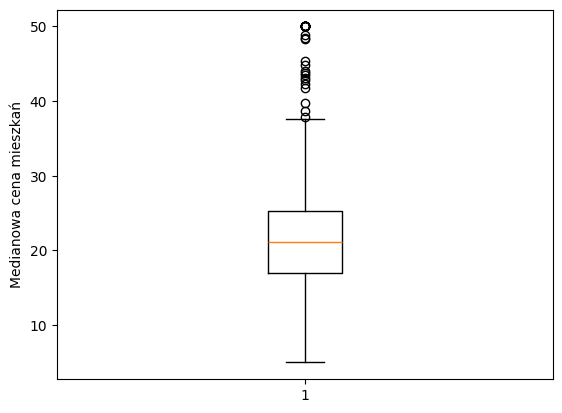

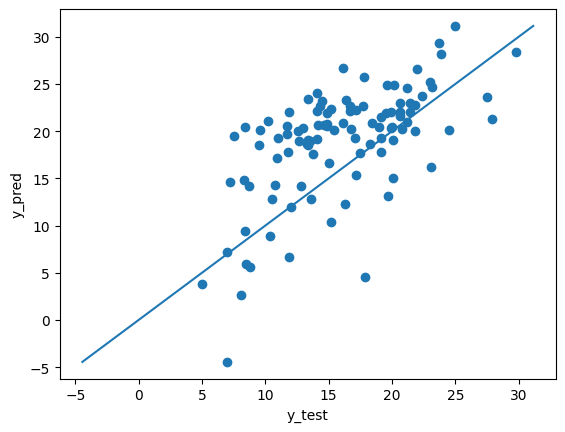

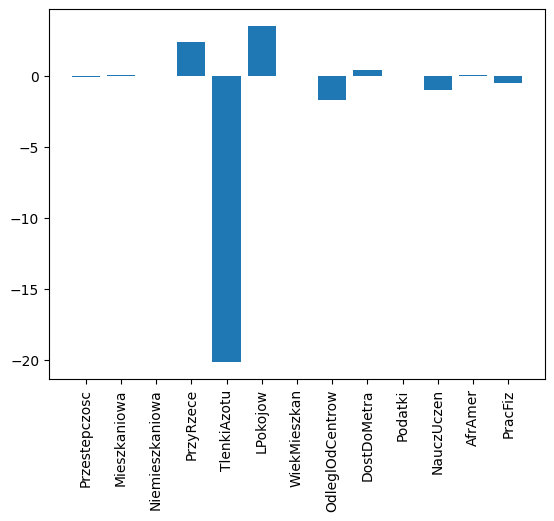

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split    # import funkcji do podziału danych
bh_data = pd.read_excel('housing.xlsx')                 # wczytanie danych
bh_cechy = bh_data.columns.to_list()                    # lista cech
bh_arr = bh_data.values                                 # konwersja na tablicę numpy
X, y = bh_arr[:,:-1], bh_arr[:,-1]                      # podział na macierz cech i wektor etykiet
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=221, shuffle=False) # na podstawie danych X_train i y_train tworzymy dane X_test i y_test, które następnie możemy przyrównać "do siebie"
# linia przekątna wyznacza jakby lustro między punktami, im bliżej punkty są do linii środkowej, tym lepiej model przewiduje

from sklearn.linear_model import LinearRegression       # import modelu regresji liniowej
linReg = LinearRegression()                             # utworzenie instancji modelu
linReg.fit(X_train, y_train)                            # dopasowanie modelu
y_pred = linReg.predict(X_test)                         # predykcja na danych testowych
minval = min(y_test.min(), y_pred.min())                # minimalna wartość
maxval = max(y_test.max(), y_pred.max())                # maksymalna wartość
fig1, fig2 = plt.subplots()
plt.scatter(y_test, y_pred)                             # wykres punktowy
plt.plot([minval, maxval], [minval, maxval])            # wykres funkcji tożsamości
plt.xlabel('y_test')                                    # etykieta osi x
plt.ylabel('y_pred')                                    # etykieta osi y
plt.figure(0)

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error # import funkcji do obliczania błędów
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=221, shuffle=True) # podział danych
linReg = LinearRegression()                            # utworzenie instancji modelu
linReg.fit(X_train, y_train)                           # dopasowanie modelu
y_pred = linReg.predict(X_test)                        # predykcja na danych testowych
mse = mean_squared_error(y_test, y_pred)               # obliczenie błędu średniokwadratowego
mae = mean_absolute_error(y_test, y_pred)              # obliczenie błędu średniowartościowego
mape = mean_absolute_percentage_error (y_test, y_pred) # obliczenie błędu średnioprocentowego
print(f'MSE: {mse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}') # wyświetlenie wyników

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True) # podział danych
# wyświetl drugi, osobny wykres, pudełkowy medianowej ceny mieszkań
plt.boxplot(y_train) # wykres pudełkowy
plt.ylabel('Medianowa cena mieszkań') # etykieta osi y
plt.figure(1)
plt.plot() # wyświetlenie wykresu


print(bh_data.head()) # kilka pierwszych linii danych

import numpy as np
linReg = LinearRegression()                         # utworzenie instancji modelu
linReg.fit(X_train, y_train)                        # dopasowanie modelu
bh_cechy = bh_data.columns.to_list()                # lista cech
niezleżne_cechy = bh_cechy[:-1]                     # lista niezależnych cech
fig, ax = plt.subplots(1,1)                         # utworzenie obiektów rysunku i osi
x = np.arange(len(niezleżne_cechy))                 # wektor indeksów
wagi = linReg.coef_                                 # wagi modelu
ax.bar(x, wagi)                                     # wykres słupkowy
ax.set_xticks(x)                                    # ustawienie ticków 
ax.set_xticklabels(niezleżne_cechy, rotation = 90)  # ustawienie etykiet

#### Zadanie 2.1. Pierwsze spojrzenie
Pobierz plik „housing.xlsx” ze strony kursu. Podobnie do zadań z poprzednich zajęć
(Zadanie 1.4) wygeneruj macierz korelacji dla wczytanego zbioru. Przeanalizuj macierz
korelacji. Jakie zależności mogą mieć związek, a jakie są przypadkowe? Wygeneruj wykresy
korelacji pomiędzy cechami niezależnymi a cecha zależną (medianową ceną mieszkania).

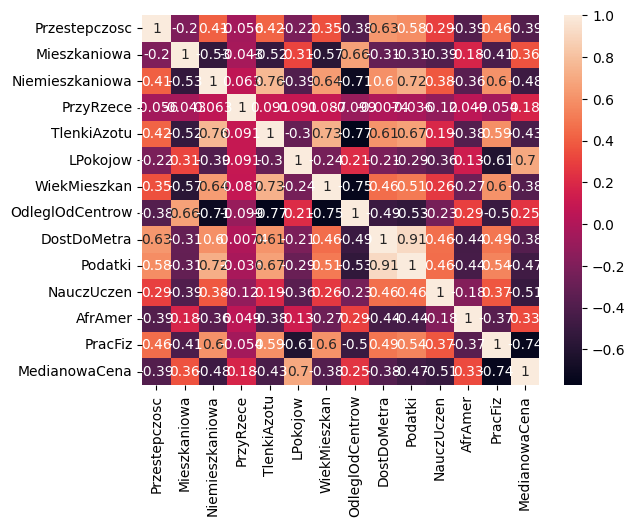

In [23]:
import seaborn as sns
corr = bh_data.corr() # macierz korelacji
sns.heatmap(corr, annot=True) # wykres ciepła
plt.show() # wyświetlenie wykresu



#### Zadanie 2.2.Wielokrotne testowanie modelu
Zmodyfikuj skrypt, który pokazuje Listing 2.4, tak, żeby powstał skrypt pozwalający na
wielokrotne przetestowanie modelu regresji liniowej. Skrypt umieść w oddzielnej funkcji, która
jako argument przyjmie liczbę powtórzeń, które trzeba wykonać. Podpowiedź: w funkcji

In [39]:
def testuj_model(n_powtorzen):                  # funkcja testująca model
    mape = []                                   # lista błędów
    for i in range(n_powtorzen):                # pętla powtórzeń
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle=True) # podział danych
        linReg = LinearRegression()             # utworzenie instancji modelu
        linReg.fit(X_train, y_train)            # dopasowanie modelu
        y_pred = linReg.predict(X_test)         # predykcja na danych testowych
        mape.append(mean_absolute_percentage_error(y_test, y_pred)) # obliczenie błędu średnioprocentowego
    return np.mean(mape)                        # zwrócenie średniej wartości błędu

print("Średni procent błędu regresji: "+str(testuj_model(1000)*100)+"%") 


Średni procent błędu regresji: 17.181706837351392%


#### Zadanie 2.3. Uwzględnienie wartości odstających
Wykonaj Zadanie 2.2 dodając do niego procedurę usuwania/zastępowania wartości
odstających. Porównaj wyniki uzyskane w poprzednim zadaniu z nowymi wynikami.

In [45]:
outliers = np.abs((y_train - y_train.mean())/ y_train.std())>3  # wykrycie wartości odstających
X_train_no_outliers = X_train[~outliers,:]                      # usunięcie wartości odstających
y_train_no_outliers = y_train[~outliers]                        # usunięcie wartości odstających
y_train_mean = y_train.copy()                                   # skopiowanie wektora etykiet
y_train_mean[outliers] = y_train.mean()                         # zastąpienie wartości odstających średnią

def testuj_model2(n_powtorzen):  # funkcja testująca model
    mape = []  # lista błędów
    for i in range(n_powtorzen):  # pętla powtórzeń
        X_train_no_outliers, X_test, y_train_no_outliers, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)  # podział danych
        linReg = LinearRegression()  # utworzenie instancji modelu
        linReg.fit(X_train, y_train)  # dopasowanie modelu
        y_pred = linReg.predict(X_test)  # predykcja na danych testowych
        mape.append(mean_absolute_percentage_error(y_test, y_pred))  # obliczenie błędu średnioprocentowego
    return np.mean(mape)  # zwrócenie średniej wartości błędu

print("Średni procent błędu regresji po usunięciu wartości odstających: "+str(testuj_model2(1000)*100)+"%") 


Średni procent błędu regresji po usunięciu wartości odstających: 17.19800935582553%
